In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [5]:
df.drop(columns=["User ID","Gender"],axis=1,inplace=True)

In [6]:
df.head(1)

,Age,EstimatedSalary,Purchased
0,19,19000,0


In [7]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.duplicated().sum()

33

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [11]:
x=df.iloc[:,0:2]

In [12]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [13]:
y=df.iloc[:,-1]

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [15]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=3)
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(knn_model, x, y, cv=kf)


In [17]:
print("Cross-validation results:", cross_val_results)
print("Mean accuracy: {:.2f}%".format(cross_val_results.mean() * 100))

Cross-validation results: [0.67567568 0.83783784 0.75675676 0.94594595 0.86486486 0.81081081
 0.83783784 0.86111111 0.69444444 0.75      ]
Mean accuracy: 80.35%


In [18]:
from sklearn.model_selection import train_test_split


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [21]:
for n in range (5,25):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(f"{n} : {metrics.accuracy_score(y_test, y_pred)}")

5 : 0.7432432432432432
6 : 0.7567567567567568
7 : 0.7567567567567568
8 : 0.7432432432432432
9 : 0.7297297297297297
10 : 0.7432432432432432
11 : 0.7837837837837838
12 : 0.7432432432432432
13 : 0.7297297297297297
14 : 0.7432432432432432
15 : 0.7297297297297297
16 : 0.7432432432432432
17 : 0.7162162162162162
18 : 0.7432432432432432
19 : 0.7297297297297297


20 : 0.7297297297297297
21 : 0.7432432432432432
22 : 0.7297297297297297
23 : 0.7162162162162162
24 : 0.7162162162162162


In [22]:
# compute z-score for age colum 
mean = df['Age'].mean()
std = df['Age'].std()
df['Age_ZScore'] = (df['Age'] - mean) / std

In [23]:
df['Age_ZScore'].head(5)

0   -1.752776
1   -0.254843
2   -1.097430
3   -1.003809
4   -1.752776
Name: Age_ZScore, dtype: float64

In [24]:
# compute z-score for EstimatedSalary colum 
mean = df['EstimatedSalary'].mean()
std = df['EstimatedSalary'].std()
df['Salary_ZScore'] = (df['EstimatedSalary'] - mean) / std

In [25]:
df['Salary_ZScore'].head()

0   -1.487377
1   -1.458619
2   -0.797170
3   -0.394550
4    0.151864
Name: Salary_ZScore, dtype: float64

In [26]:
df.head(5)

,Age,EstimatedSalary,Purchased,Age_ZScore,Salary_ZScore
0,19,19000,0,-1.752776,-1.487377
1,35,20000,0,-0.254843,-1.458619
2,26,43000,0,-1.097430,-0.797170
3,27,57000,0,-1.003809,-0.394550
4,19,76000,0,-1.752776,0.151864


In [27]:
x1=df.iloc[:,3:5]

In [28]:
x1.head()

,Age_ZScore,Salary_ZScore
0,-1.752776,-1.487377
1,-0.254843,-1.458619
2,-1.097430,-0.797170
3,-1.003809,-0.394550
4,-1.752776,0.151864


In [29]:
y1=df.iloc[:,2]

In [30]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [31]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)

In [32]:
for n in range (5,25):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train1, y_train1)
    y_pred1 = knn.predict(x_test1)
    print(f"{n} : {metrics.accuracy_score(y_test1, y_pred1)}")

5 : 0.918918918918919
6 : 0.9054054054054054
7 : 0.918918918918919
8 : 0.918918918918919
9 : 0.918918918918919
10 : 0.8918918918918919
11 : 0.918918918918919
12 : 0.9054054054054054
13 : 0.918918918918919
14 : 0.9054054054054054
15 : 0.918918918918919
16 : 0.918918918918919
17 : 0.918918918918919
18 : 0.9054054054054054
19 : 0.918918918918919
20 : 0.9054054054054054
21 : 0.9054054054054054
22 : 0.9054054054054054
23 : 0.9054054054054054
24 : 0.918918918918919


In [33]:
for n in range (5,25):   
    knn_model = KNeighborsClassifier(n_neighbors=5)
    kf = KFold(n_splits=n, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(knn_model, x, y, cv=kf)
    print(f"{n} folds: Mean accuracy: {cross_val_results.mean() * 100:.2f}%")

5 folds: Mean accuracy: 78.49%
6 folds: Mean accuracy: 80.12%


7 folds: Mean accuracy: 80.40%
8 folds: Mean accuracy: 79.01%
9 folds: Mean accuracy: 80.62%
10 folds: Mean accuracy: 80.64%
11 folds: Mean accuracy: 80.97%
12 folds: Mean accuracy: 79.57%
13 folds: Mean accuracy: 80.42%
14 folds: Mean accuracy: 79.87%
15 folds: Mean accuracy: 79.87%
16 folds: Mean accuracy: 79.83%
17 folds: Mean accuracy: 80.10%
18 folds: Mean accuracy: 80.69%
19 folds: Mean accuracy: 80.19%
20 folds: Mean accuracy: 80.72%
21 folds: Mean accuracy: 79.35%
22 folds: Mean accuracy: 80.61%
23 folds: Mean accuracy: 80.92%
24 folds: Mean accuracy: 81.30%


In [34]:
for n in range (5,25):   
    knn_model = KNeighborsClassifier(n_neighbors=5)
    kf = KFold(n_splits=n, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(knn_model, x1, y1, cv=kf)
    print(f"{n} folds: Mean accuracy: {cross_val_results.mean() * 100:.2f}%")

5 folds: Mean accuracy: 88.01%
6 folds: Mean accuracy: 88.02%
7 folds: Mean accuracy: 89.11%
8 folds: Mean accuracy: 88.56%
9 folds: Mean accuracy: 88.54%
10 folds: Mean accuracy: 87.70%
11 folds: Mean accuracy: 88.30%
12 folds: Mean accuracy: 88.30%
13 folds: Mean accuracy: 88.85%
14 folds: Mean accuracy: 88.31%
15 folds: Mean accuracy: 88.00%
16 folds: Mean accuracy: 88.01%
17 folds: Mean accuracy: 87.45%
18 folds: Mean accuracy: 88.29%
19 folds: Mean accuracy: 88.05%
20 folds: Mean accuracy: 87.76%
21 folds: Mean accuracy: 87.46%
22 folds: Mean accuracy: 87.67%
23 folds: Mean accuracy: 87.46%
24 folds: Mean accuracy: 88.35%


In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [58]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)

In [59]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(x_train1, y_train1)

SGDClassifier(random_state=42)

In [38]:
y_pred3 = sgd_model.predict(x_test1)

In [39]:
accuracy = accuracy_score(y_test1, y_pred3)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [40]:
matrix = confusion_matrix(y_test1, y_pred3)
print(f"confusion_matrix: \n{matrix}")

confusion_matrix: 
[[42  4]
 [ 9 19]]


In [41]:
precision = precision_score(y_test1, y_pred3)
print(f"Precision: {precision:.2f}")

Precision: 0.83


In [42]:
recall = recall_score(y_test1, y_pred3)
print(f"Recall: {recall:.2f}")

Recall: 0.68


In [43]:
tn, fp, fn, tp = matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.91


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds =precision_recall_curve(y_test1, y_pred3)

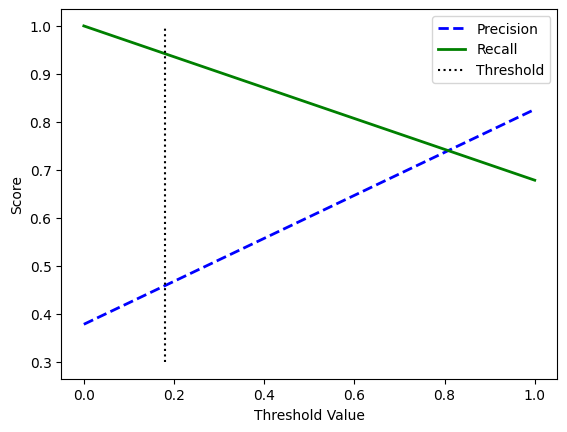

In [45]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision",linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",linewidth=2)
threshold = 0.18
plt.vlines(threshold, 0.3, 1.0, "k", "dotted", label="Threshold")
plt.xlabel('Threshold Value')
plt.ylabel('Score')
plt.legend()
plt.show()

In [49]:
#y_scores = sgd_model.decision_function([y_train1,y_test1])
y_scores = sgd_model.decision_function(x_test1)


In [54]:
y_scores

array([-3.38761217, -2.76849375, -0.26649687, -1.82917261,  2.02141397,
        0.5901658 ,  1.19874686, -5.90025257, -7.81495542,  1.02702255,
       -5.85789082,  0.64957839,  3.28517401,  2.16348505,  2.26949557,
       -4.72132217,  4.01671029, -1.32877323,  5.72569329,  2.07018305,
       -7.65170347,  1.27716916, -4.93975055, -4.52418082,  1.70338241,
        2.38397844,  3.87040303, -5.91936843, -0.15407901, -5.13482689,
       -4.89945382, -4.62171899, -0.66718691, -6.25227968, -3.383376  ,
       -1.10404367, -3.05687209, -3.12682205, -1.83340878,  1.8730417 ,
       -0.47428173, -5.85571966, -3.90712741, -2.42287398, -3.08228914,
       -4.42664265,  4.35809389, -2.56918124, -2.2213903 , -3.84141363,
       -1.57685483,  0.12365582, -0.36827121, -0.99162581, -4.72772951,
        5.20411304, -7.35485278, -6.21621912, -8.34294301, -1.45172845,
        2.72112586, -1.3330094 ,  0.25942571, -6.00626309, -5.8960164 ,
       -4.25698336, -2.48011541, -6.61484415,  5.78934206, -1.45

In [50]:
threshold1 = 0.18
y_predict1 = (y_scores >= threshold1).astype(int)

In [51]:
accuracy1 = accuracy_score(y_test1, y_predict1)
matrix1 = confusion_matrix(y_test1, y_predict1)
precision1 = precision_score(y_test1, y_predict1)
recall1 = recall_score(y_test1, y_predict1)
tn1, fp1, fn1, tp1 = matrix1.ravel()
specificity1 = tn1 / (tn1 + fp1)

print(f"Accuracy: {accuracy1:.2f}")
print(f"confusion_matrix: \n{matrix1}")
print(f"Recall: {recall1:.2f}")
print(f"Specificity: {specificity1:.2f}")

Accuracy: 0.89
confusion_matrix: 
[[47  2]
 [ 6 19]]
Recall: 0.76
Specificity: 0.96


In [52]:
precisions, recalls, thresholds =precision_recall_curve(y_test1, y_predict1)

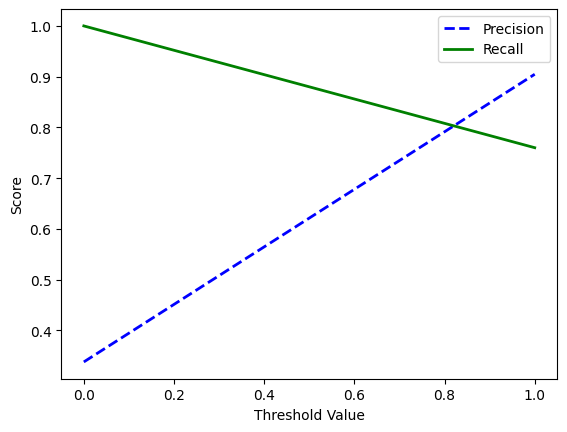

In [53]:
precisions, recalls, thresholds =precision_recall_curve(y_test1, y_predict1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision",linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",linewidth=2)
#threshold = 0.25
#plt.vlines(threshold, 0.3, 1.0, "k", "dotted", label="Threshold")
plt.xlabel('Threshold Value')
plt.ylabel('Score')
plt.legend()
plt.show()

In [60]:
threshold2 = .85
y_predict2 = (y_scores >= threshold2).astype(int)

In [61]:
accuracy2 = accuracy_score(y_test1, y_predict2)
matrix2 = confusion_matrix(y_test1, y_predict2)
precision2 = precision_score(y_test1, y_predict2)
recall2 = recall_score(y_test1, y_predict2)
tn2, fp2, fn2, tp2 = matrix2.ravel()
specificity2 = tn2 / (tn2 + fp2)

print(f"Accuracy: {accuracy2:.2f}")
print(f"confusion_matrix: \n{matrix2}")
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"Specificity: {specificity2:.2f}")

Accuracy: 0.69
confusion_matrix: 
[[42  9]
 [14  9]]
Precision: 0.50
Recall: 0.39
Specificity: 0.82


In [62]:
precisions, recalls, thresholds =precision_recall_curve(y_test1, y_predict2)

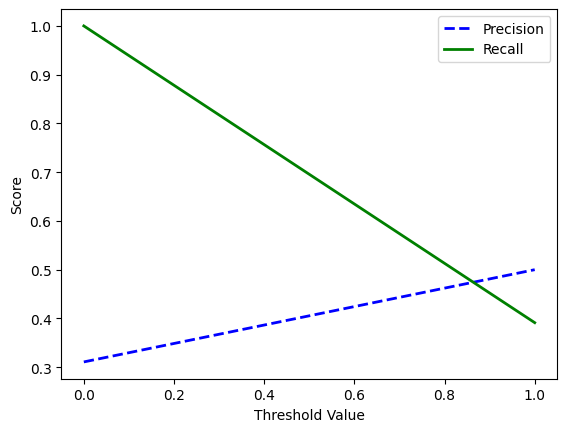

In [63]:
precisions, recalls, thresholds =precision_recall_curve(y_test1, y_predict2)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision",linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",linewidth=2)
#threshold = 0.25
#plt.vlines(threshold, 0.3, 1.0, "k", "dotted", label="Threshold")
plt.xlabel('Threshold Value')
plt.ylabel('Score')
plt.legend()
plt.show()